## Task #2 - mortalities

### I used top 20 countires which have highest number of deaths as my data (to create my dataframe), I considered 10 deaths to be day 1.

In [1]:
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import adjustText
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

# READ CUMULATIVE TABLE
covid_cumulative = pd.read_excel("covid_a_master_cumulative_table.xlsx")

In [2]:
# This part is necessary instead of simply ['Date'].max() because some countries do not report on certain days (e.g. Spain on Sundays) -- FIXED BUG
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max() # type(last_day_per_country) is pandas.Series
last_day_per_country = last_day_per_country.to_frame() # We convert it to pandas.DataFrame
last_day_per_country.reset_index(inplace=True) # And reset the index so that we can further join on 'Countries'

In [3]:
# N: HOW MANY TOP COUNTRIES YOU WANT TO PICK IN TERMS OF # OF DEATHS
N = 20
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Deaths', ascending=False)
top_countries = last_day[:N]['Countries'].tolist()
top_countries

['USA',
 'Brazil',
 'Mexico',
 'India',
 'UK',
 'Italy',
 'France',
 'Spain',
 'Peru',
 'Iran',
 'Colombia',
 'Russia',
 'S.Africa',
 'Chile',
 'Belgium',
 'Germany',
 'Canada',
 'Argentina',
 'Indonesia',
 'Iraq']

In [4]:
# K: HOW MANY CASES YOU CONSIDER THE DAY 0
K = 10
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Deaths'] > K]
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
3781,3781,61,12,2020-02-25,Iran,82913893.0,Asia
3848,3848,95,15,2020-02-26,Iran,82913893.0,Asia
3852,3852,322,11,2020-02-26,Italy,60359546.0,Europe
3915,3915,139,19,2020-02-27,Iran,82913893.0,Asia
3919,3919,400,12,2020-02-27,Italy,60359546.0,Europe
...,...,...,...,...,...,...,...
38854,38854,613378,28124,2020-08-27,Peru,32510462.0,America
38861,38861,970865,16683,2020-08-27,Russia,145872260.0,Europe
38863,38863,615701,13502,2020-08-27,S.Africa,58558267.0,Africa
38897,38897,328846,41465,2020-08-27,UK,66647112.0,Europe


In [5]:
# FIND THE DATE FOR THE FIRST K DEATHS OCCURS
day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
day_0_for_every_country = day_0_for_every_country['Date']

In [6]:
day_0_for_every_country

Countries
Argentina   2020-03-27
Belgium     2020-03-15
Brazil      2020-03-21
Canada      2020-03-21
Chile       2020-04-01
Colombia    2020-03-31
France      2020-03-09
Germany     2020-03-16
India       2020-03-26
Indonesia   2020-03-20
Iran        2020-02-25
Iraq        2020-03-18
Italy       2020-02-26
Mexico      2020-03-28
Peru        2020-03-28
Russia      2020-04-01
S.Africa    2020-04-06
Spain       2020-03-10
UK          2020-03-15
USA         2020-03-05
Name: Date, dtype: datetime64[ns]

In [7]:
# MERGE THE TWO TO GET THE DAY_0 IN THE df, AND CALCULATE THE DAYS_FROM_0
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days

In [8]:
covid_top_countries['Deaths\_per\_1m'] = covid_top_countries['Deaths']/covid_top_countries['Population'] * 1000000

In [9]:
max_slope = covid_top_countries.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Deaths\_per\_1m', ascending=False)
max_slope['Countries'] = max_slope.index

data_1_5 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()
max_slope

,Unnamed: 0,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Deaths\_per\_1m,Countries
Countries,,,,,,,,,,
Peru,38854,613378,28124,2020-08-27,3.251046e+07,America,2020-03-28,152,865.075372,Peru
Belgium,38721,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,862.379086,Belgium
UK,38897,328846,41465,2020-08-27,6.664711e+07,Europe,2020-03-15,165,622.157491,UK
Spain,38672,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-10,169,617.230819,Spain
Italy,38801,262540,35458,2020-08-27,6.035955e+07,Europe,2020-02-26,183,587.446433,Italy
Chile,38743,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,579.884957,Chile
Brazil,38730,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,557.523185,Brazil
USA,38898,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-05,175,546.135400,USA
Mexico,38828,573888,62076,2020-08-27,1.275755e+08,America,2020-03-28,152,486.582344,Mexico


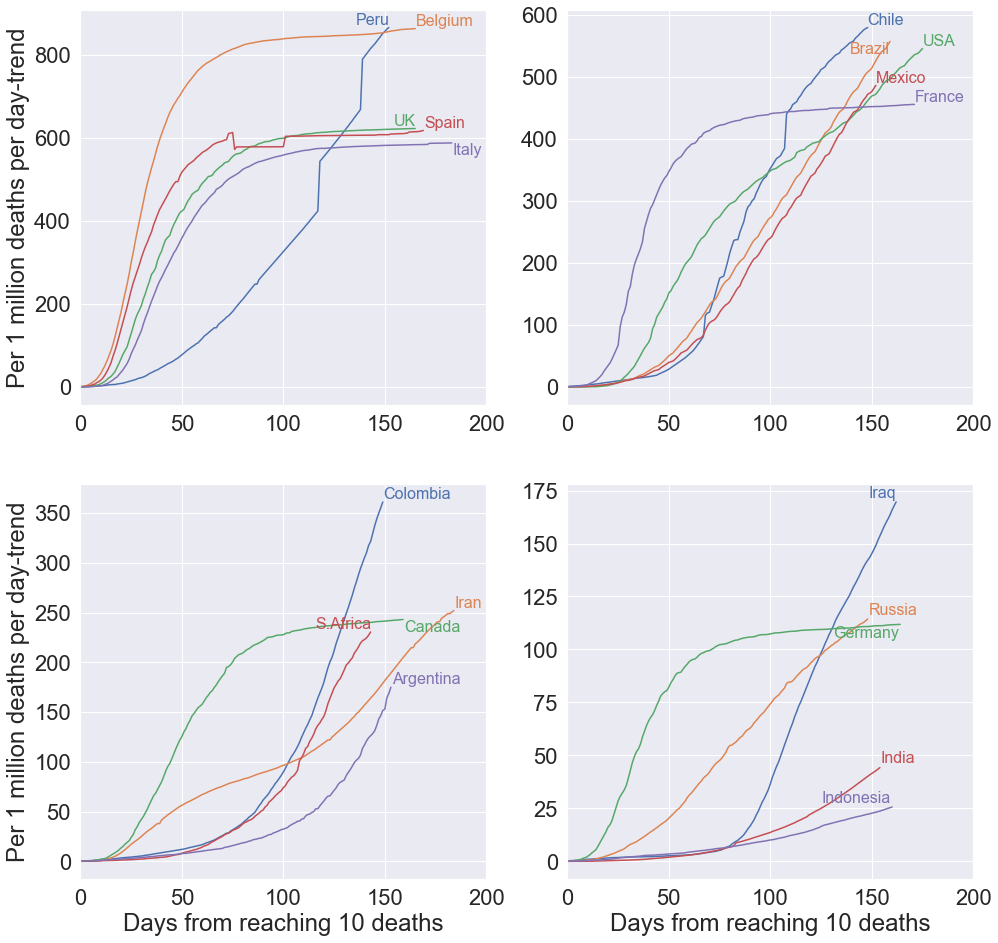

In [10]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days_from_0", y="Deaths\_per\_1m", hue="Countries", data=data_1_5, markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths\_per\_1m'], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Per 1 million deaths per day-trend",fontsize=24)

sns.lineplot(x="Days_from_0", y="Deaths\_per\_1m", hue="Countries", data=data_6_10, markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths\_per\_1m'], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)

sns.lineplot(x="Days_from_0", y="Deaths\_per\_1m", hue="Countries", data=data_11_15, markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths\_per\_1m'], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Per 1 million deaths per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 10 deaths",fontsize=24)

sns.lineplot(x="Days_from_0", y="Deaths\_per\_1m", hue="Countries", data=data_16_20, markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths\_per\_1m'], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 10 deaths",fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])

plt.savefig('Fig_2_2_Fan_Zheyuan.png')